<a href="https://colab.research.google.com/github/boangri/neuraluniversity/blob/master/HW15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к занятию №15 "Введение в генетические алгоритмы"

Борис Грибовский xinu@yandex.ru

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Реализуем генетический алгоритм (общую часть кода) в виде generic класса.

In [ ]:
class GA():
    def __init__(self, n, l, split=0.2, reverse=False, dtype=np.float32):
        """
        n: число ботов (размер популяции)
        l: размерность бота
        split: доля популяции, переходящая в новое поколение
        reverse: флаг True - ищем максимум функции потерь
        dtype: тип данных бота (float, int)
        """
        self.n = n
        self.l = l
        self.dtype = dtype
        self.nsurv = int(n*split)
        self.popul = np.zeros((self.n, self.l), dtype=dtype)
        self.best = np.zeros((self.nsurv, self.l), dtype=dtype)
        self.val = np.zeros(n)
        self.reverse = reverse

    def selectBest(self):
        for i in range(self.n):
            self.val[i] = self.loss(self.popul[i])
        idx = sorted([i for i in range(self.n)], key=lambda i: self.val[i])
        self.best = self.popul[idx[:self.nsurv]].copy() 
        self.popul[:self.nsurv] = self.best
        for i in range(self.nsurv):
            self.val[i] = self.loss(self.popul[i])
        return 

    def newGeneration(self):
        for i in range(self.nsurv, self.n):
            i1, i2 = np.random.choice(self.nsurv, 2, replace=False) # выбрали 2-х родителей
            self.child(i, i1, i2)
            self.val[i] = self.loss(self.popul[i])
        return

    def mutation(self):
        return

    def evolution(self):
        self.selectBest()
        self.newGeneration()
        self.mutation()

    def child(self, i, i1, i2):
        for j in range(self.l):
            self.popul[i, j] = self.popul[i1, j] if np.random.rand() < 0.5 else self.popul[i2, j]
        return

    def loss(self, bot):
        return 0.0

    

## LIGHT

### 1
С помощью генетического алгоритма найдите точку, где функция от трёх переменных: f = x^2/y + z\*(12-z) + 5\*y/x  равна 0 (символ ^2 -возведение в квадрат). Интервал изменения каждой переменной x, y, z и вывести на экран значение этой точки и значение функции в ней


In [ ]:
class L1GA(GA):
    """
    n: - размер популяции
    l: - размерность ботов
    split: - доля ботов переходящаяя в следующее поколений (0. - 1.)
    eps: - вероятность мутации
    k: - интенсивность мутации
    """
    def __init__(self, n, l, split=0.2, eps=0.1, k=0.1):
        self.a = np.array([1, 5, 10, 30, 0,0,0,0, 0,0,0,0], np.float32).T
        self.b = np.array([0,0,0,0, 1, 5, 10, 30, 0,0,0,0], np.float32).T
        self.c = np.array([0,0,0,0, 0,0,0,0, 1, 5, 10, 30], np.float32).T
        super(L1GA, self).__init__(n, l, split)
        self.popul = np.random.normal(0, 1, (n, l))
        self.eps = eps
        self.k = k

    def mutation(self):
        for i in range(self.nsurv, self.n):
            if np.random.random() < self.eps:
                self.popul[i] += self.k*np.random.normal(0, 1, self.l)

    def loss(self, bot):
        return abs(self.func(*self.xyz(bot)))

    def xyz(self, bot):
        x = np.dot(bot, self.a)
        y = np.dot(bot, self.b)
        z = np.dot(bot, self.c)
        return (x, y, z)

    def func(self, x, y, z):
        return x**2/y + z*(12-z) + 5*y/x

Сделаем 100 попыток (с разными начальными инициализациями)

In [ ]:
%%time
accuracy = 0.01
for seed in range(100):
    np.random.seed(seed)
    ga = L1GA(100, 12, eps=0.3, k=1.)
    for ep in range(1000):
        ga.evolution()
        if ga.val[0] < accuracy:
            break
    if ga.val[0] < accuracy:
        print("seed=%d x=%.3f, y=%.3f z=%.3f f=%6f epochs:%d" % (seed, (*ga.xyz(ga.popul[0])+(ga.val[0],)), ep))

seed=0 x=22.361, y=-39.012 z=2.198 f=0.005105 epochs:8
seed=1 x=-59.508, y=40.877 z=16.918 f=0.009286 epochs:72
seed=2 x=29.874, y=-69.103 z=9.395 f=0.007191 epochs:315
seed=3 x=-11.628, y=23.242 z=0.358 f=0.008987 epochs:472
seed=5 x=-40.685, y=-88.970 z=11.323 f=0.000900 epochs:997
seed=6 x=23.027, y=-62.170 z=2.262 f=0.000493 epochs:10
seed=7 x=15.767, y=-29.522 z=10.267 f=0.009804 epochs:25
seed=8 x=26.104, y=-52.758 z=9.602 f=0.004318 epochs:548
seed=11 x=3.776, y=-26.715 z=5.700 f=0.005936 epochs:8
seed=13 x=-26.684, y=-35.231 z=1.268 f=0.004324 epochs:183
seed=14 x=32.660, y=-60.050 z=9.008 f=0.002985 epochs:498
seed=15 x=7.150, y=-33.185 z=9.354 f=0.001185 epochs:54
seed=16 x=-42.824, y=-103.821 z=0.480 f=0.009634 epochs:1
seed=17 x=21.757, y=-39.344 z=2.135 f=0.009124 epochs:14
seed=18 x=20.813, y=-66.806 z=9.669 f=0.003328 epochs:7
seed=19 x=-0.578, y=2.328 z=1.998 f=0.008719 epochs:9
seed=20 x=-6.930, y=32.575 z=2.262 f=0.003152 epochs:248
seed=21 x=6.209, y=-28.701 z=2.602 

#### ВЫВОДЫ

* Множество решений одного уравнений с тремя неизвестными будет образовывать двумерную поверхность в трехмерном пространстве. Задавая разные сиды (начальные условия) мы каждый раз будем получать разные точки на этой поверхности.
* При некоторых начальных условиях не удается получить заданную точность, алгоритм не сходится. Довольно сложно добиться высокой точности, нужно адаптивно уменьшать интенсивность мутаций по мере схождения алгоритма.
* Сложно получить все решения (а иногда это невозможно, как в данной задаче - пространство решений непрерывно). Алгоритм подходит, когда достаточно получить любое решение, а не все.
* В целом алгоритм довольно медленный.
*Для задач ГА очень хорошо подходят методы ООП: основную логику алгоритма - генерацию новой популяции - можно реализовать в дженерик-классе, а методы, специфичные для каждой конкретной задачи - инициализацию генотипа, отображения генотипа на фенотип, мутации, функции потерь/качества - можно реализовать в наследуемых классах. 



### 2
Проведите анализ скорости сходимости до заданной вами точности (выберите точность, близкую к минимуму в прошлом примере) и заполните таблицу - какими были параметры и за сколько эпох алгоритм дошёл до нужной точности
* Выберите три разные размера популяции
* Выберите три разные коэффициента мутации
* Выберите три разных количества выживших


In [ ]:
%%time
accuracy = 0.01
n_seed = 100 # число прогонов для статистики (100 дает отн. точность 10%)
max_epochs = 1000
results = np.zeros((3, 3, 3), dtype=np.float32) # тут будем собирать статистику
popul_sizes = (100, 200, 400) # размер популяции
mut_probabilites = (0.125, 0.25, 0.5) # вероятность мутации
splits = (0.0625, 0.1250, 0.2500) # доля выживающих
for i, n in enumerate(popul_sizes):
    for j, eps in enumerate(mut_probabilites):
        for k, split in enumerate(splits):
            print("Population size: %d, Mutation probability: %.4f, Split: %.4f" % (n, eps, split))
            epochs = 0.
            n_success = 0
            for seed in range(n_seed): # Набираем статистику по заданной комбинации параметров
                np.random.seed(seed)
                ga = L1GA(n=n, l=12, split=split, eps=eps, k=1.)
                for ep in range(max_epochs):
                    ga.evolution()
                    if ga.val[0] < accuracy:
                        epochs += (ep + 1)
                        n_success += 1 
                        break
            if n_success > 0:
                epochs /= n_success # получаем среднее число эпох (без учета неудачных попыток достичь точности)
            else:
                epochs = NaN # ГА не сошелся ни разу
            results[i, j, k] = epochs
            print("epochs=%.1f удачных:%.2f%% x=%.3f, y=%.3f z=%.3f f=%6f" % (epochs, n_success/n_seed*100., (*ga.xyz(ga.popul[0])+(ga.val[0],))))

Population size: 100, Mutation probability: 0.1250, Split: 0.0625
epochs=294.6 удачных:48.00% x=24.313, y=-29.731 z=2.837 f=0.001680
Population size: 100, Mutation probability: 0.1250, Split: 0.1250
epochs=316.6 удачных:55.00% x=24.313, y=-29.731 z=2.837 f=0.001680
Population size: 100, Mutation probability: 0.1250, Split: 0.2500
epochs=230.9 удачных:59.00% x=24.313, y=-29.731 z=2.837 f=0.001680
Population size: 100, Mutation probability: 0.2500, Split: 0.0625
epochs=340.3 удачных:65.00% x=24.313, y=-29.731 z=2.837 f=0.001680
Population size: 100, Mutation probability: 0.2500, Split: 0.1250
epochs=313.0 удачных:63.00% x=24.313, y=-29.731 z=2.837 f=0.001680
Population size: 100, Mutation probability: 0.2500, Split: 0.2500
epochs=264.5 удачных:76.00% x=24.313, y=-29.731 z=2.837 f=0.001680
Population size: 100, Mutation probability: 0.5000, Split: 0.0625
epochs=254.6 удачных:91.00% x=24.313, y=-29.731 z=2.837 f=0.001680
Population size: 100, Mutation probability: 0.5000, Split: 0.1250
epo

In [ ]:
# Размер популяции 100:
df = pd.DataFrame(results[0, :, :], columns=splits, index=mut_probabilites)
df

,0.0625,0.1250,0.2500
0.125,294.583344,316.600006,230.864410
0.250,340.307678,312.984131,264.500000
0.500,254.582413,288.302338,222.451218


In [ ]:
# Размер популяции 200:
df = pd.DataFrame(results[1, :, :], columns=splits, index=mut_probabilites)
df

,0.0625,0.1250,0.2500
0.125,193.226669,207.425003,95.252747
0.250,234.186813,161.795700,105.173912
0.500,157.070007,128.371140,111.666664


In [ ]:
# Размер популяции 400:
df = pd.DataFrame(results[2, :, :], columns=splits, index=mut_probabilites)
df

,0.0625,0.1250,0.2500
0.125,119.979164,99.687500,22.808081
0.250,112.980003,65.059998,22.443298
0.500,66.290001,47.250000,25.299999


#### ВЫВОД

Оказалось, что довольно сложно найти устойчивые, явные закономерности - при запуске с различными сидами получаются совершенно разные картины. Число эпох - очень случайная величина, при фиксированных исследуемых параметрах может изменяться (в зависимости от сида) от единиц до бесконечности (т.е. при некоторых сидах алгоритм не сходится). Поэтому для выявления закономерностей мне пришлось набирать статистику - 100 прогонов по каждой из 27 комбинаций параметров. Это дало относительную точность 10%. 

Выявлены закономерности:

- Увеличение частоты мутаций в сочетании с низкой долей выживающих приводит к увеличению доли удачных попыток. Так что при плохой сходимости следует увеличивать интенсивность мутаций.

- Увеличение размера популяции приводит к уменьшению среднего числа эпох, однако выигрыш по времени в этом случае неочевиден, так как пропорционально увеличивается время на обсчет популяции.

- Увеличение доли выживших всегда приводило к уменьшению числа эпох.


### 3
Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределение грузов по поездам:
Поезда - 1, 12, 72, 4, 55, 1
Грузы - 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8


In [ ]:
train = np.array([1, 12, 72, 4, 55, 1])
cargo = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8])

train.sum(), cargo.sum()

(145, 145)

Расширяем дженерик класс - специфичная инициализация и функция потерь.

In [ ]:
class trainGA(GA):
    def __init__(self, n, l):
        super(trainGA, self).__init__(n, l, dtype=np.uint8)
        for i in range(n):
            for j in range(l):
                self.popul[i, j] = np.random.randint(0, len(train))

    def loss(self, bot):
        load = np.zeros(len(train), np.int32)
        for i in range(len(cargo)):
            load[bot[i]] += cargo[i]
        loss = 0
        for j in range(len(train)):
            if load[j] > train[j]:
                loss += (load[j] - train[j])
        return loss

Перебираем 100 начальных инициализаций, выводим те, которые сошлись.

In [ ]:
%%time
accuracy = 1e-8
for seed in range(100):
    np.random.seed(seed)
    ga = trainGA(100, len(cargo))
    for ep in range(1000):
        ga.evolution()
        if ga.val[0] < accuracy:
            break
    if ga.val[0] < accuracy:
        print("seed=%d, "%seed, ga.popul[0], "epochs:%d"%ep)

seed=4,  [4 5 1 0 2 4 3 2 3 2 2 4 4 1 4 2 4 4] epochs:11
seed=18,  [2 0 1 5 3 4 1 2 2 4 2 4 4 4 2 2 2 1] epochs:11
seed=28,  [0 2 1 5 2 3 4 1 3 2 4 4 4 2 2 2 4 1] epochs:6
seed=31,  [1 5 1 2 3 4 1 4 0 4 2 1 2 2 2 4 4 4] epochs:10
seed=34,  [5 0 4 3 2 2 4 3 1 2 2 2 4 1 4 4 4 4] epochs:11
seed=36,  [3 5 0 4 2 1 3 2 1 2 2 4 2 4 4 4 4 1] epochs:14
seed=42,  [3 0 4 1 1 3 4 2 5 2 2 1 4 2 4 4 4 4] epochs:9
seed=64,  [2 0 1 5 2 4 1 3 3 2 4 2 4 2 2 4 4 1] epochs:5
seed=67,  [4 1 5 3 4 3 4 4 0 2 2 2 4 1 4 2 4 4] epochs:396
seed=68,  [0 1 3 5 4 4 1 3 1 2 2 4 2 4 4 2 1 4] epochs:10
seed=73,  [5 3 1 0 4 3 4 4 4 2 2 4 2 1 4 4 2 4] epochs:9
seed=82,  [5 0 3 1 4 4 1 3 1 2 2 1 4 4 4 2 2 4] epochs:8
seed=84,  [0 5 2 1 3 4 2 1 1 4 2 4 1 4 2 4 2 2] epochs:10
seed=86,  [1 1 5 2 3 4 1 2 0 4 2 4 4 4 2 1 2 2] epochs:10
seed=90,  [1 0 5 3 1 2 3 4 4 2 2 4 4 2 4 4 1 4] epochs:7
seed=94,  [2 0 1 3 4 4 3 1 5 4 2 4 2 2 2 4 4 1] epochs:11
seed=98,  [5 3 0 1 4 4 3 4 2 2 4 4 4 1 2 2 2 2] epochs:7
seed=99,  [3 1 0 2 4 

#### ВЫВОД

* как и в первом случае, задача имеет множество решений, и решение зависит от инициализации.
* особенность: в зависимости от сида алгоритм либо сходится быстро, менее чем за 15 эпох либо не сходится даже за 1000 эпох.

### 4
Решите задачу расстановки грузов по поездам с дополнительным условием - надо заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):
Поезда - 10, 10, 10, 12, 12, 12
Грузы - 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6


In [ ]:
train = np.array([10, 10, 10, 12, 12, 12])
cargo = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])
train.sum(), cargo.sum()

(66, 54)

Расширим предыдущий класс, нам надо изменить только функцию потерь.

In [ ]:
class train2GA(trainGA):
    def loss(self, bot):
        loadAvg = cargo.sum()/len(train) # такой должна быть загрузка
        load = np.zeros(len(train), np.int32)
        for i in range(len(cargo)):
            load[bot[i]] += cargo[i]
        loss = 0
        for j in range(len(train)):
            loss += abs(loadAvg - load[j]) # штрафуем за отклонение от нормы загрузки
        return loss

In [ ]:
%%time
accuracy = 1e-8
for seed in range(100):
    np.random.seed(seed)
    ga = train2GA(100, len(cargo))
    for ep in range(1000):
        ga.evolution()
        if ga.val[0] < accuracy:
            break
    if ga.val[0] < accuracy:
        print("seed=%d, "%seed, ga.popul[0], "epochs:%d"%ep)

seed=1,  [2 4 4 1 2 4 3 5 3 1 5 0 3 5 4 1 0 2]
seed=11,  [1 5 0 2 3 0 2 4 3 1 4 5 4 3 1 5 0 2]
seed=16,  [1 2 1 2 4 1 0 2 3 0 4 5 0 4 1 2 3 5]
seed=20,  [5 1 2 3 0 1 2 4 4 0 3 5 4 0 5 3 1 2]
seed=25,  [5 2 0 0 2 0 3 3 4 1 2 2 5 5 3 0 4 1]
seed=26,  [3 3 4 0 4 0 5 3 4 2 4 5 1 5 3 1 0 2]
seed=30,  [5 5 0 4 2 5 0 4 2 4 4 3 2 1 5 1 0 3]
seed=31,  [4 4 1 2 3 3 0 2 4 5 1 0 0 4 3 1 5 2]
seed=34,  [0 0 3 3 0 1 5 5 1 4 3 2 1 3 0 5 4 2]
seed=35,  [4 2 2 5 2 3 2 5 3 4 1 2 3 0 0 4 1 5]
seed=37,  [0 0 1 2 3 1 5 3 2 5 0 4 0 5 2 3 4 1]
seed=43,  [1 2 5 4 1 2 2 5 5 4 3 5 2 0 4 0 1 3]
seed=46,  [5 4 0 5 2 0 4 2 1 4 4 5 3 5 2 3 1 0]
seed=47,  [5 2 1 0 5 2 4 2 3 0 1 4 2 4 0 1 5 3]
seed=49,  [4 1 3 5 0 3 5 2 2 0 4 1 2 0 1 4 5 3]
seed=54,  [2 3 3 3 5 5 5 3 5 1 0 2 3 4 4 2 1 0]
seed=55,  [2 3 2 0 3 2 2 5 4 2 5 0 1 5 1 0 4 3]
seed=56,  [4 5 5 2 1 4 5 0 2 3 0 1 0 1 5 2 4 3]
seed=60,  [1 2 1 4 1 4 4 1 2 0 1 3 5 4 5 2 0 3]
seed=61,  [2 4 0 2 3 2 2 0 4 1 3 2 3 5 5 4 0 1]
seed=77,  [5 1 1 1 4 5 4 0 3 5 0 5 0 2 4 

#### ВЫВОД
очевидно что задача имеет гигантское количество решений, в основном отличающихся перестановкой равноценных грузов. Из одного решения можно получить перестановками 4! \* 4! \* 4! \* 8 = 110592 решения. И это без учета 36 перестановок одинаковых вагонов.

## PRO задание. Вариант 1
Напишите кластеризацию данных с помощью генетических алгоритмов. Создайте 3 класса двумерных точек, выберите центры классов на достаточном расстоянии и сгенерируйте точки с разбросом так, чтобы классы не пересекались

Нужно расставить индексы точек, к какому классу относится какая точка, с помощью генетического алгоритма. В результате, каждый класс должен состоять из точек одного и того же индекса
Визуализируйте процесс обучение и итоговый результат


In [ ]:
N = 300 # число точек 
M = 3 # число классов 
points = np.random.normal(0, 0.2, (N, 2)) # координаты точек 
fi = np.pi*np.arange(M)*2/M
x = np.cos(fi)
y = np.sin(fi)

In [ ]:
for n in range(N):
    m = np.random.randint(0, M)
    points[n, 0] += x[m]
    points[n, 1] += y[m]    

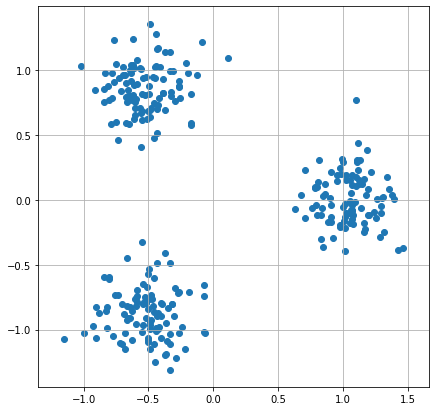

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1])
plt.axis('equal')
plt.grid()
plt.show()

Генотип бота будет состоять из 3-х пар координат - кандидатов на центры кластеров.

In [ ]:
class pointsGA(GA):
    def __init__(self, n, points, split=0.2, M=3, eps=0.1, k=1.):
        """
        n: число ботов в популяции
        M: число кластеров (считается известным заранее)
        points - массив точек, которые надо распределить по кластерам размер (N, 2) - номер точки, x, y
        """
        super(pointsGA, self).__init__(n, M*2, split=split)
        self.n = n
        self.M = M
        self.eps = eps
        self.k = k
        self.popul = np.random.normal(0, 1, (self.n, self.M, 2))
        self.point = points

    def loss(self, bot):
        value = 0.
        for i in range(self.point.shape[0]): # по всем точкам
            # Последовательно примеряем точку к каждому центру кластера
            min = 1e10
            for j in range(self.M): # вычисляем квадрат расстояния от точки i до центра кластера j.
                r2 = (bot[j, 0] - self.point[i, 0])**2 + (bot[j, 1] - self.point[i, 1])**2
                if r2 < min :
                    min = r2
            value += min
        return value/self.point.shape[0] # средний квадрат расстояния до ближайшего центра кластера

    def mutation(self):
        for i in range(self.nsurv, self.n):
            if np.random.random() < self.eps:
                self.popul[i] += self.k*np.random.normal(0, 1, (self.M, 2))

    def child(self, i, i1, i2):
        for j in range(self.M):
            if np.random.random() < 0.5:
                self.popul[i, j] = self.popul[i1, j]  
            else:
                self.popul[i, j] = self.popul[i2, j]
        return

In [ ]:
np.random.seed(3)

ga = pointsGA(100, points, eps=0.5)
for ep in range(100):
    ga.evolution()
    print("ep=%d loss=%.3f" % (ep + 1, ga.val[0]))
print(ga.popul[0])

ep=1 loss=0.198
ep=2 loss=0.198
ep=3 loss=0.156
ep=4 loss=0.116
ep=5 loss=0.116
ep=6 loss=0.116
ep=7 loss=0.107
ep=8 loss=0.107
ep=9 loss=0.107
ep=10 loss=0.107
ep=11 loss=0.107
ep=12 loss=0.107
ep=13 loss=0.107
ep=14 loss=0.107
ep=15 loss=0.107
ep=16 loss=0.107
ep=17 loss=0.107
ep=18 loss=0.107
ep=19 loss=0.107
ep=20 loss=0.107
ep=21 loss=0.107
ep=22 loss=0.107
ep=23 loss=0.107
ep=24 loss=0.107
ep=25 loss=0.107
ep=26 loss=0.107
ep=27 loss=0.107
ep=28 loss=0.107
ep=29 loss=0.107
ep=30 loss=0.107
ep=31 loss=0.107
ep=32 loss=0.107
ep=33 loss=0.107
ep=34 loss=0.107
ep=35 loss=0.107
ep=36 loss=0.107
ep=37 loss=0.107
ep=38 loss=0.107
ep=39 loss=0.107
ep=40 loss=0.107
ep=41 loss=0.107
ep=42 loss=0.107
ep=43 loss=0.107
ep=44 loss=0.107
ep=45 loss=0.107
ep=46 loss=0.107
ep=47 loss=0.107
ep=48 loss=0.107
ep=49 loss=0.107
ep=50 loss=0.107
ep=51 loss=0.107
ep=52 loss=0.107
ep=53 loss=0.107
ep=54 loss=0.107
ep=55 loss=0.107
ep=56 loss=0.107
ep=57 loss=0.107
ep=58 loss=0.107
ep=59 loss=0.107
ep=60 

Нулевой бот содержит координаты центров кластеров.

In [ ]:
ga.popul[0]

array([[-0.7160258 ,  0.73146574],
       [ 1.12397796, -0.13191423],
       [-0.53058214, -0.73052664]])

распределим точки по кластерам.

In [ ]:
x = [[], [], []] # три списка точек для каждого кластера
y = [[], [], []]
bot = ga.popul[0]
for i in range(N):
    min = 1e10
    n_class = None
    for j in range(M): # вычисляем квадрат расстояния от точки i до центра кластера j.
        r2 = (bot[j, 0] - points[i, 0])**2 + (bot[j, 1] - points[i, 1])**2
        if r2 < min :
            min = r2
            n_class = j
    x[n_class].append(points[i, 0])
    y[n_class].append(points[i, 1])




---


Визуализируем полученный результат - выделем цветом каждый кластер и красными крестиками покажем 
найденные центры кластеров.

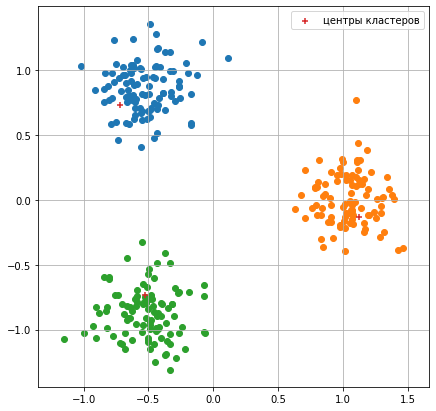

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(x[0], y[0])
plt.scatter(x[1], y[1])
plt.scatter(x[2], y[2])
plt.scatter(bot[:, 0], bot[:, 1], marker='+', label="центры кластеров")
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

Центры кластеров определились не очень точно, но этого вполне достаточно для правильной кластеризации точек.

## PRO задание. Вариант 2
* Выберите другую симуляцию из окружений openAI (можно из той же серии для движка box2d https://gym.openai.com/envs/#box2d) 
* С помощью генетического алгоритма обучите объект выбранной симуляции выполнять поставленную задачу




---


Выбрал среду MountainCarContinuous-v0 с непрерывным пространством действий.

In [ ]:
!apt install swig cmake libopenmpi-dev zlib1g-dev # cmake - сборка - аналог GNU Make, но с другим синтаксисом, libopenmpi-dev распределённые вычисления в кластере для дебиан, zlib1g-dev - сжатие траффика
!pip install stable-baselines==2.5.1 box2d box2d-kengz # устанавливаем непосредственно сам stable baseline и движок box2d

# если убрать " > /dev/null 2>&1" то работа сервера будет выведена на экран, а этой командой перемещаем все в фоновый режим
!pip install gym pyvirtualdisplay > /dev/null 2>&1 # установка пакета для рендера видео
!pip install xvfbwrapper # установка обертки для пакета, который позволит воспроизводить видео в ячейке колаба  
!apt-get update # обновляем все пакеты до новейшей версии, чтобы все пакеты "подружились"
!sudo apt-get install xvfb # установка удаленного сервера, благодаря которому видео будет воспроизводиться в ячейке колаба
!apt-get install xdpyinfo # пакет для вывода процессов, происходящих на сервере

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
swig is already the newest version (3.0.12-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 57 not upgraded.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/com

In [ ]:
import gym # здесь лежат все модели для 
from gym import logger as gymlogger # загрузим библиотеку для изменения параметра вывода ошибок
from gym.wrappers import Monitor # библиотека для обертки видео из хранилища в ячейку
gymlogger.set_level(40) # для правильного отображения ошибок
import numpy as np # библиотека массивов numpy
import random # библиотека для генерации случайных значений
import matplotlib # библиотека для визуализации процессов
import matplotlib.pyplot as plt # библиотека для построения графика
%matplotlib inline
import glob # расширение для использования Unix обозначений при задании пути к файлу
import io # библиотека для работы с потоковыми данными
import base64 # расширение для преобразования в формат base64 (универсальный формат хранения сырых изображений в виде набора электрических сигналов)
from IPython.display import HTML # библиотека для кодирования в код HTML
import time # библиотека для расчета времени обучения

from IPython import display as ipythondisplay # для работы с "сырым" форматом (набор сигналов, а не пиксели)
from pyvirtualdisplay import Display # для создания окна дисплея

In [ ]:
# Создаем объект дисплей, таким образом, симуляцию можно будет наблюдать в колабе
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

Расширим наш дженерик - реализуем функцию потерь и механизм мутаций

Будем искать решение как линейную комбинацию координаты, скорости и их квадратов:
```
f = bot[0]*x + bot[1]*v + bot[2]*x*x + bot[3]*v*v + bot[4]
```
---



In [ ]:
class carGA(GA):
    def __init__(self, n, l=5, split=0.2, eps=0.3):
        super(carGA, self).__init__(n, l, split)
        self.n = n
        self.l = l
        self.eps = eps
        self.popul = np.random.normal(0, 1, (n, l))

    def loss(self, bot):
        env = gym.make('MountainCarContinuous-v0')
        env.seed(42)
        observation = env.reset()
        done = False
        sum = 0.
        while not done:
            x = observation[0]
            v = observation[1]
            f = bot[0]*x + bot[1]*v + bot[2]*x*x + bot[3]*v*v + bot[4]
            action = np.array((f,))
            observation, reward, done, _ = env.step(action) 
            # print(action, reward)
            sum -= reward  # берем со знаком минус чтобы искать минимум.
        # print("sum=%.3f"%sum)
        return sum 

    def mutation(self):
        for i in range(self.nsurv, self.n):
            if random.random() < self.eps:
                self.popul[i] += np.random.normal(0, 1, (self.l,))

Создаем экземпляр класса и запускаем эволюцию на 20 поколений

In [ ]:
ga = carGA(100)
for ep in range(20):
    ga.evolution()
    print(ga.val[0], ga.popul[0])


-77.67667912430394 [-0.0918308   2.90671334  0.21911114  0.16741974  0.45960638]
-82.27880073693531 [-0.0918308   2.90671334  0.65074524 -1.49948067  0.19831422]
-82.77214881140668 [ 0.7330981   2.90671334  0.84465715 -1.49948067  0.51190828]
-85.89840614991692 [0.02464703 3.64061398 0.09447881 1.19540121 0.41024987]
-87.56119187325876 [ 0.24579998  3.06387737 -0.12907334  0.16741974  0.48188719]
-89.0678096406997 [ 0.02464703  3.64061398 -0.14742521  1.19540121  0.41024987]
-92.29675012418681 [ 0.24579998  3.64061398 -0.14742521  0.16741974  0.41024987]
-92.30799570565559 [ 0.24579998  3.64061398 -0.14742521 -0.53170249  0.41024987]
-92.30799570565559 [ 0.24579998  3.64061398 -0.14742521 -0.53170249  0.41024987]
-92.30799570565559 [ 0.24579998  3.64061398 -0.14742521 -0.53170249  0.41024987]
-92.30799570565559 [ 0.24579998  3.64061398 -0.14742521 -0.53170249  0.41024987]
-92.30799570565559 [ 0.24579998  3.64061398 -0.14742521 -0.53170249  0.41024987]
-92.30799570565559 [ 0.24579998  3



---

Тестируем полученный результат

In [ ]:
env = gym.make('MountainCarContinuous-v0')
env.seed(1)
env = wrap_env(env) # оборачиваем наше окружения для записи видео
observation = env.reset() # начинаем эпизод
done = False
while not done:
    env.render() # Рендер окружения
    bot = ga.popul[0]
    x = observation[0]
    v = observation[1]
    f = bot[0]*x + bot[1]*v + bot[2]*x*x + bot[3]*v*v + bot[4]
    action = np.array((f,))
    observation, reward, done, _ = env.step(action) 
env.close()
show_video()

Все получилось!

##ULTRA PRO задание 1
Напишите обучение змейки из одноимённой игры с помощью генетического алгоритма
- Поле 20 на 20
- На поле есть “еда”, всегда одна в один момент
- Змейка двигается на одну клетку и может в любой момент повернуть налево или направо
- Если змейка съедает еду, она получает +1 очко рейтинга и становится длиннее на 1 со стороны хвоста. После съедания, еда появляется в случайном месте (но не на самой змейке)
- Змейка проигрывает, если выходит за край экрана или “кусает себя за хвост”
- Змейка может видеть весь экран, вы сами можете выбрать, какие параметры подавать змейке на вход и по какой функции он выбирает, что делать следующим шагом
- Вариантов действий строго три: продолжить движение прямо, повернуть налево, повернуть направо


---

У меня есть собственная реализация этой игры в формате Gym, написанная для дипломного проекта

Установим ее из репозитория github:

In [ ]:
!git clone https://github.com/boangri/gym-snake.git 

Cloning into 'gym-snake'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 66 (delta 22), reused 55 (delta 14), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [ ]:
!pip install -e gym-snake

Obtaining file:///content/gym-snake
     |████████████████████████████████| 11.5MB 3.2MB/s 
  Running setup.py develop for gym-snake


После инсталяции требуется Runtime -> Restart runtime

In [ ]:
import gym
import gym_snake

gym-snake v0.1.0


Расширим класс - определим функцию потери и мутации

In [ ]:
class snakeGA(GA):
    def __init__(self, n, l=4, split=0.2, eps=0.5):
        super(snakeGA, self).__init__(n, l, split)
        self.n = n
        self.l = l
        self.eps = eps
        self.popul = np.random.normal(0, 1, (n, l))

    def loss(self, bot):
        env = gym.make('Snake-v0')
        # env.seed(42)
        observation = env.reset()
        done = False
        sum = 0.
        while not done:
            X, Y = observation[0:2] # координаты головы змеи
            x, y = observation[2:4] # координаты яблока
            fx = bot[0]*x - bot[0]*X 
            fy = bot[2]*y - bot[2]*Y
            if abs(fx) > abs(fy): # выбираем ту ось по которой величина больше
                action = 3 if fx > 0. else 1
            else: 
                action = 2 if fy > 0. else 0
            observation, reward, done, _ = env.step(action) 
            # print(action, reward)
            sum -= reward  # берем со знаком минус чтобы искать минимум.
        # print("sum=%.3f"%sum)
        return sum 

    def mutation(self):
        for i in range(self.nsurv, self.n):
            if random.random() < self.eps:
                self.popul[i] += np.random.normal(0, 1, (self.l,))

Обучаем, находим лучшего бота.

In [ ]:
ga = snakeGA(5000)
for ep in range(20):
    ga.evolution()
    print(ga.val[0], ga.popul[0])

pygame 2.0.0 (SDL 2.0.12, python 3.6.9)
Hello from the pygame community. https://www.pygame.org/contribute.html
-1113.0 [ 0.02641325 -0.65502703  1.17519193  0.26623437]
-1012.0 [ 0.02407842 -0.79566669  0.62530827 -2.48156395]
-757.0 [ 0.46933661 -0.54695369  0.05406987  0.07863497]
-345.0 [0.0168476  0.69629488 0.49094865 0.58191927]
-244.0 [0.01682021 1.41802302 0.2413675  1.8057498 ]
-1517.0 [ 3.24590531 -1.14336795  0.23727232  1.63635383]
-598.0 [ 0.25178598 -0.9973488   0.0089432   0.38980411]
-1012.0 [ 1.04104134 -0.07780131  0.03197747  0.23341852]
-604.0 [3.37906634 1.91465758 0.06752392 1.64336962]
-1517.0 [ 0.66988884  0.22464106  0.01718768 -0.81490169]
-497.0 [ 3.54868535 -1.41378495  0.06752392  0.28827509]
-1214.0 [ 0.46689946 -0.93242653  0.02169188 -0.38460949]
-1012.0 [ 0.01086381 -0.64418389  2.54945405  0.97888684]
-605.0 [ 1.7651405  -3.08226703  0.08991294  0.77239759]
-813.0 [2.17616972 0.32798926 0.09530516 2.0696983 ]
10.0 [ 0.0223485   0.65040484  1.51109569 

Тестируем 1 эпизод с лучшим ботом.

In [ ]:
bot = ga.popul[0]  # лучший бот
env = gym.make('Snake-v0')
env.seed(42)
env = wrap_env(env) 
observation = env.reset()
# print(observation)
done = False
score = 0
steps = 0
while not done:
    env.render()
    X, Y = observation[0:2] # координаты головы змеи
    x, y = observation[2:4] # координаты яблока
    # fx = bot[0]*x + bot[1]*X 
    # fy = bot[2]*y + bot[3]*Y
    fx = bot[0]*x - bot[0]*X 
    fy = bot[2]*y - bot[2]*Y
    if abs(fx) > abs(fy): # выбираем ту ось по которой величина больше
        action = 3 if fx > 0. else 1
    else: 
        action = 2 if fy > 0. else 0
    observation, reward, done, info = env.step(action)
    score += reward
    steps += 1
    # print("step %d action %d => %d, total: %d" % (steps, action, reward, score))
print("End of episode")
env.close()
show_video()

End of episode


По непонятной причине у меня не получилось записать видео в колабе (возможно данный трюк не годится для записи Pygame окон)

пришлось проиграть этот ноутбук на локальном компе с юпитером и записать видео.